# **MUSIC RECOMMENDATION SYSTEM**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mlt
from matplotlib import style

In [ ]:
musicdata = pd.read_csv("genres_v2.csv");

In [ ]:
musicdata.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN


In [ ]:
musicdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0,title
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,0.0,0.0
mean,0.649694,0.626465,5.259203,-7.973249,0.567691,0.138886,0.170145,0.178574,0.182468,0.293777,150.972292,176707.482045,3.958004,NaN,NaN
std,0.154297,0.174285,3.685901,3.069663,0.495472,0.130238,0.213474,0.316243,0.143004,0.207779,27.858072,55868.421383,0.373475,NaN,NaN
min,0.136000,0.000243,0.000000,-24.203000,0.000000,0.024200,0.000008,0.000000,0.030700,0.029200,75.418000,42133.000000,1.000000,NaN,NaN
25%,0.549000,0.500500,1.000000,-9.800500,0.000000,0.043600,0.014500,0.000000,0.100000,0.122000,129.983000,136337.250000,4.000000,NaN,NaN
50%,0.661000,0.626000,6.000000,-7.653000,1.000000,0.077900,0.077300,0.000296,0.120000,0.246000,144.982000,167863.000000,4.000000,NaN,NaN
75%,0.765000,0.759000,8.000000,-5.852000,1.000000,0.206750,0.248000,0.180750,0.209000,0.426000,164.952250,209334.500000,4.000000,NaN,NaN
max,0.985000,0.995000,11.000000,0.551000,1.000000,0.946000,0.984000,0.989000,0.958000,0.965000,220.290000,497778.000000,5.000000,NaN,NaN


In [ ]:
musicdata.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [ ]:
musicdata['title'].isna().value_counts()

True    3287
Name: title, dtype: int64

In [ ]:
df = musicdata.drop('song_name',axis=1)

In [ ]:
musicdata.shape

(3287, 22)

In [ ]:
musicdata.duplicated().sum()

0

In [ ]:
musicdata.drop_duplicates(inplace=True)

In [ ]:
musicdata.duplicated().sum()

0

In [ ]:
musicdata.isna().sum()

danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            1
acousticness           1
instrumentalness       1
liveness               1
valence                1
tempo                  1
type                   1
id                     1
uri                    1
track_href             1
analysis_url           1
duration_ms            1
time_signature         1
genre                  1
song_name              1
Unnamed: 0          3287
title               3287
dtype: int64

In [ ]:
musicdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0,title
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,0.0,0.0
mean,0.649694,0.626465,5.259203,-7.973249,0.567691,0.138886,0.170145,0.178574,0.182468,0.293777,150.972292,176707.482045,3.958004,NaN,NaN
std,0.154297,0.174285,3.685901,3.069663,0.495472,0.130238,0.213474,0.316243,0.143004,0.207779,27.858072,55868.421383,0.373475,NaN,NaN
min,0.136000,0.000243,0.000000,-24.203000,0.000000,0.024200,0.000008,0.000000,0.030700,0.029200,75.418000,42133.000000,1.000000,NaN,NaN
25%,0.549000,0.500500,1.000000,-9.800500,0.000000,0.043600,0.014500,0.000000,0.100000,0.122000,129.983000,136337.250000,4.000000,NaN,NaN
50%,0.661000,0.626000,6.000000,-7.653000,1.000000,0.077900,0.077300,0.000296,0.120000,0.246000,144.982000,167863.000000,4.000000,NaN,NaN
75%,0.765000,0.759000,8.000000,-5.852000,1.000000,0.206750,0.248000,0.180750,0.209000,0.426000,164.952250,209334.500000,4.000000,NaN,NaN
max,0.985000,0.995000,11.000000,0.551000,1.000000,0.946000,0.984000,0.989000,0.958000,0.965000,220.290000,497778.000000,5.000000,NaN,NaN


In [ ]:
musicdata['song_name'].isna().value_counts()

False    3286
True        1
Name: song_name, dtype: int64

In [ ]:
corrilation_data = musicdata.corr()
corrilation_data

<ipython-input-15-407a911b3cc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrilation_data = musicdata.corr()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0,title
danceability,1.000000,-0.160816,-0.066918,0.000283,0.145906,0.225964,0.021788,-0.311610,-0.053737,0.385619,-0.029104,-0.337594,0.092006,NaN,NaN
energy,-0.160816,1.000000,0.044183,0.734135,0.001879,0.074742,-0.343130,-0.015834,0.228430,0.179539,-0.046360,0.072524,0.037381,NaN,NaN
key,-0.066918,0.044183,1.000000,0.006917,-0.210574,-0.052260,0.032946,0.083444,0.015263,-0.003206,-0.036866,0.053508,0.037781,NaN,NaN
loudness,0.000283,0.734135,0.006917,1.000000,0.043547,0.085516,-0.307832,-0.194030,0.171461,0.161101,-0.017058,-0.023754,0.026530,NaN,NaN
mode,0.145906,0.001879,-0.210574,0.043547,1.000000,0.089471,-0.046428,-0.108670,0.018381,0.062709,0.021968,-0.143997,0.018697,NaN,NaN
speechiness,0.225964,0.074742,-0.052260,0.085516,0.089471,1.000000,-0.000924,-0.310476,0.138839,0.285927,0.116634,-0.234233,0.049305,NaN,NaN
acousticness,0.021788,-0.343130,0.032946,-0.307832,-0.046428,-0.000924,1.000000,-0.049936,-0.120706,0.068106,0.056628,-0.051650,0.001071,NaN,NaN
instrumentalness,-0.311610,-0.015834,0.083444,-0.194030,-0.108670,-0.310476,-0.049936,1.000000,-0.062609,-0.312975,-0.103135,0.339444,-0.034779,NaN,NaN
liveness,-0.053737,0.228430,0.015263,0.171461,0.018381,0.138839,-0.120706,-0.062609,1.000000,0.116599,-0.005545,-0.060406,0.037932,NaN,NaN
valence,0.385619,0.179539,-0.003206,0.161101,0.062709,0.285927,0.068106,-0.312975,0.116599,1.000000,0.032430,-0.271193,0.072234,NaN,NaN


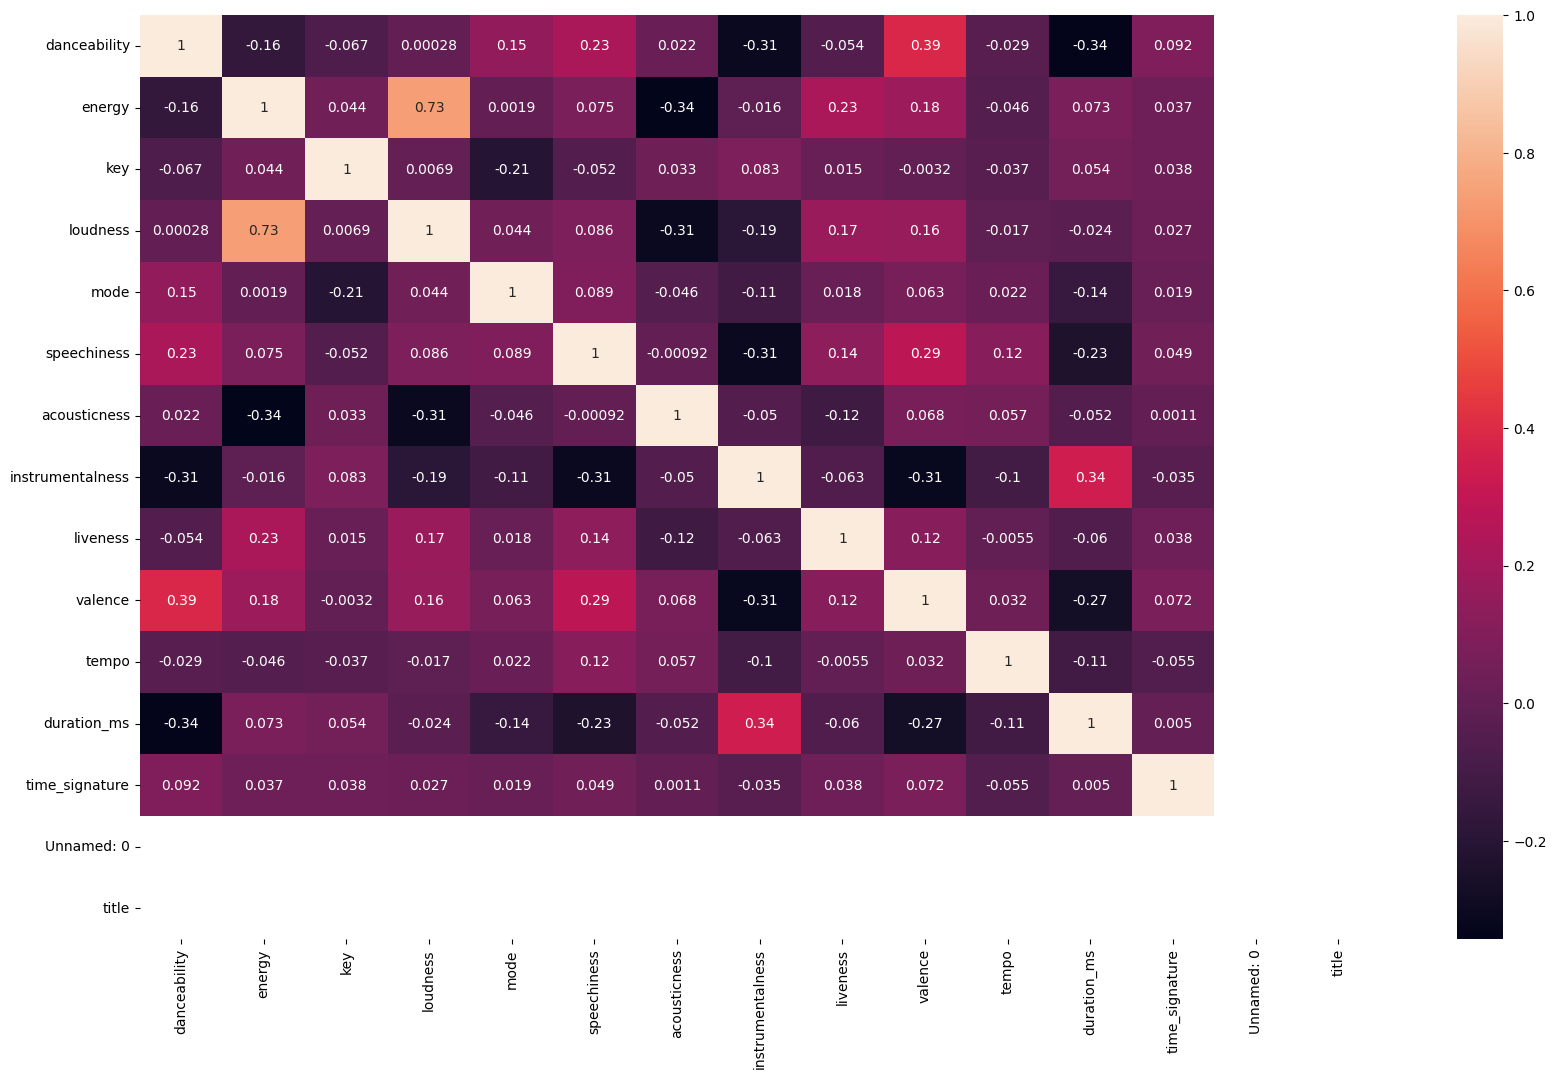

In [ ]:
mlt.figure (figsize=(20, 12))
sb.heatmap(corrilation_data,annot=True);

In [ ]:
musicdata.drop(['type'],axis=1,inplace=True)

In [ ]:
musicdata.dropna(subset=['song_name'],inplace=True)

In [ ]:
musicdata.shape

(3286, 21)

**DATA PREPROCESSING AND EDA**

In [ ]:
from sklearn import preprocessing
import math

In [ ]:
feature_cols = ['energy','loudness','valence','danceability','acousticness','instrumentalness','speechiness','tempo']

In [ ]:
normalized = preprocessing.normalize(musicdata[feature_cols])
normalized = pd.DataFrame(normalized,columns=feature_cols)

In [ ]:
normalized['mean']  = normalized.mean(axis =1)

In [ ]:
from scipy.stats import skewnorm
style.use('seaborn')

<ipython-input-24-58f7d6689dd9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


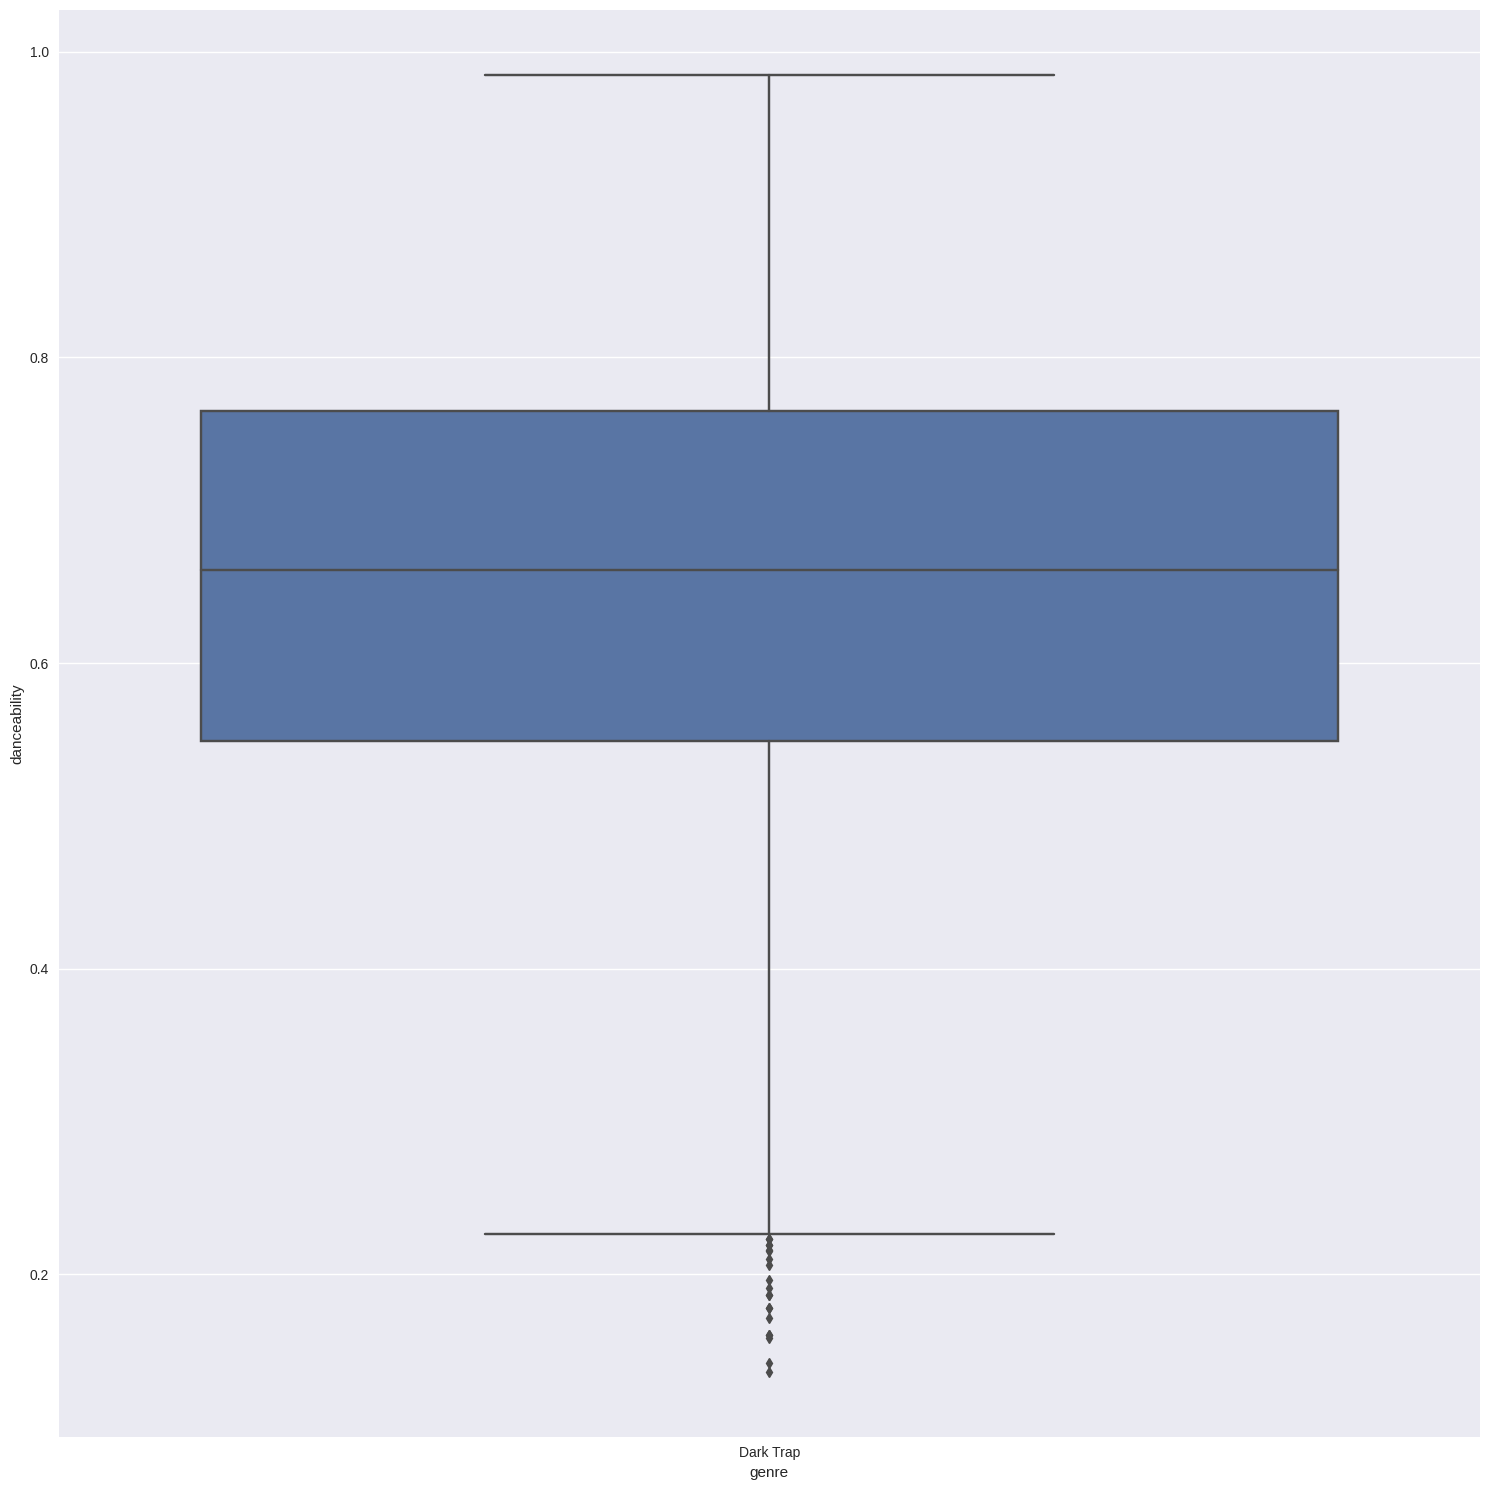

In [ ]:
sb.catplot(data=musicdata,x='genre',y= 'danceability',kind='box',height=15)

Skewness

In [ ]:
def FindSkewness(value):
    if value > 0: 
        return 'Positive Skewness'
    elif value < 0:
        return'Negative Skewness'
    return 'No Skewness'

In [ ]:
musicSkewness = musicdata.skew(axis=0)

musicSkewness = np.round(musicSkewness,decimals=2)

<ipython-input-27-64baddc84ee7>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  musicSkewness = musicdata.skew(axis=0)


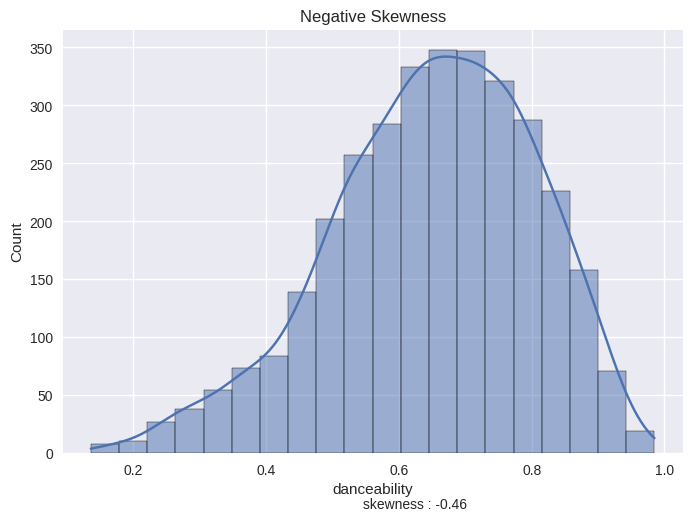

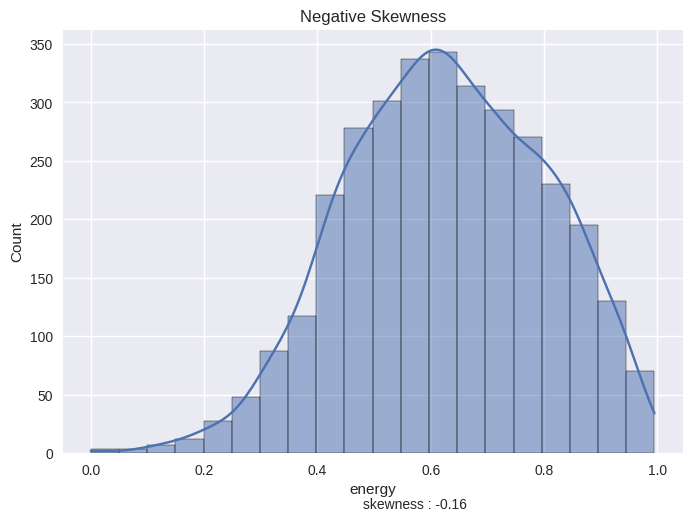

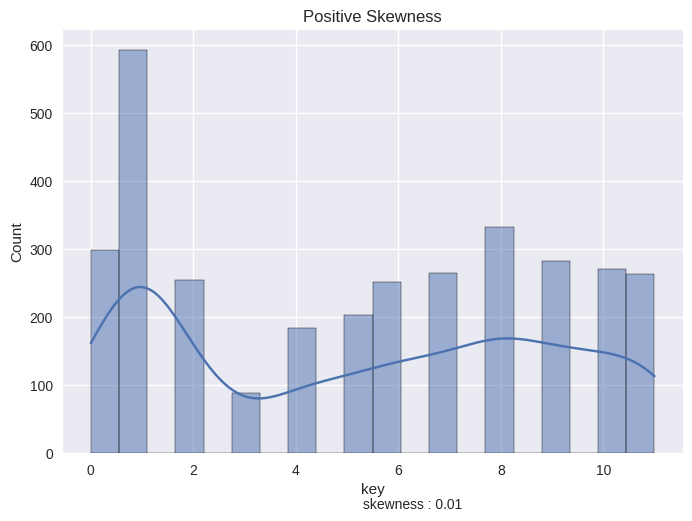

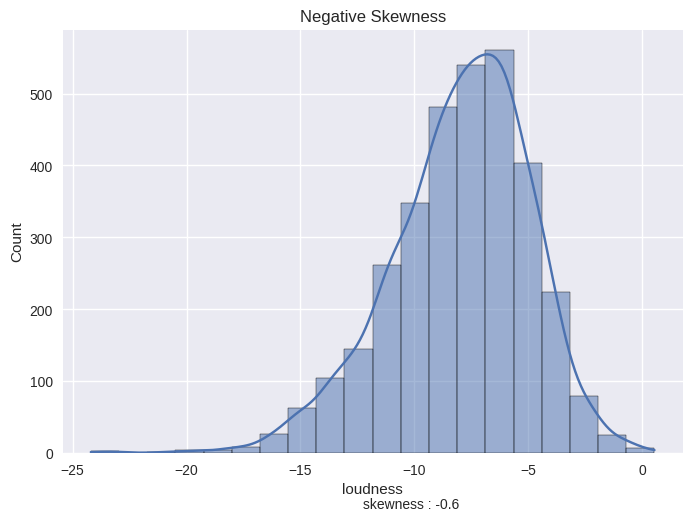

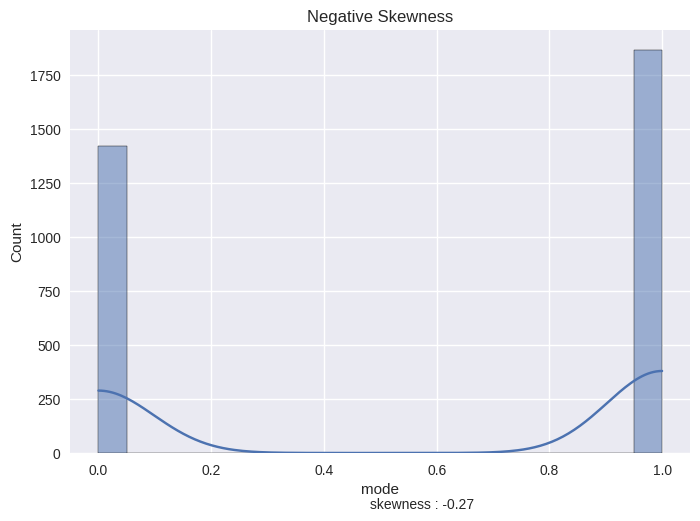

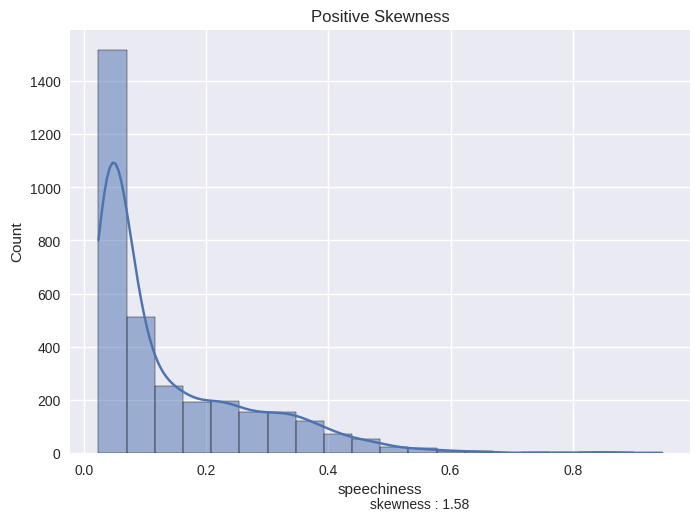

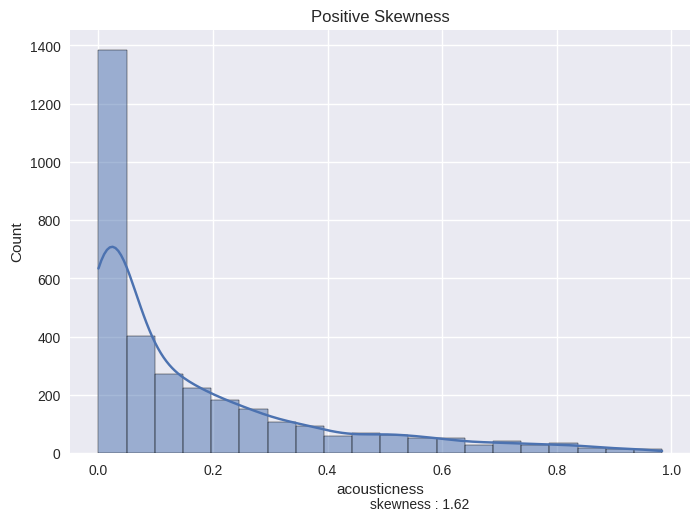

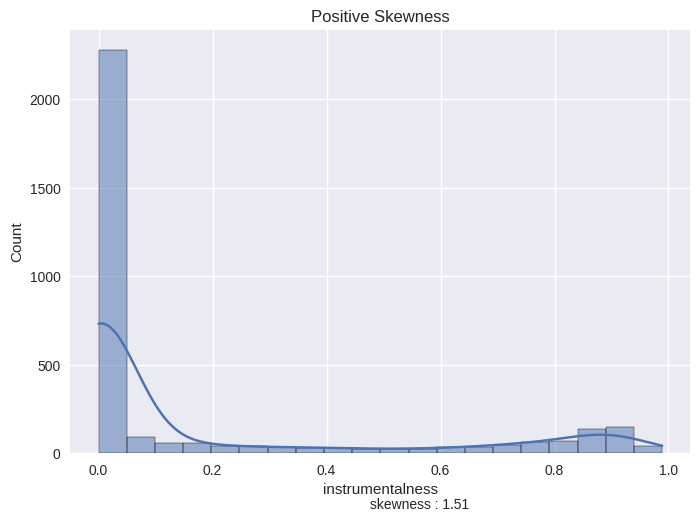

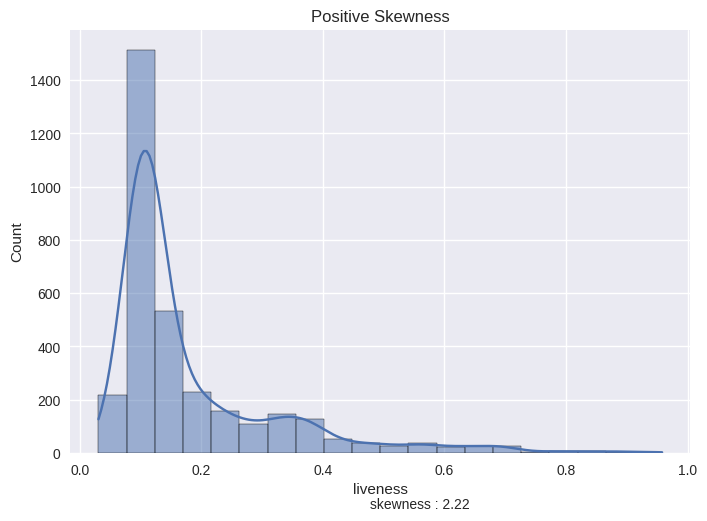

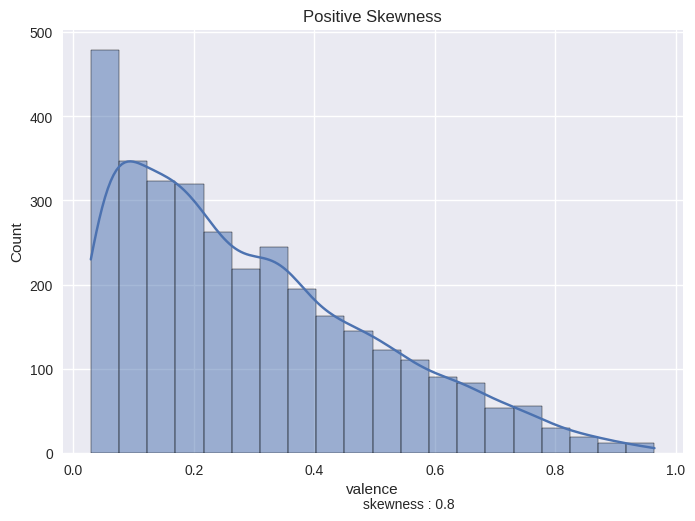

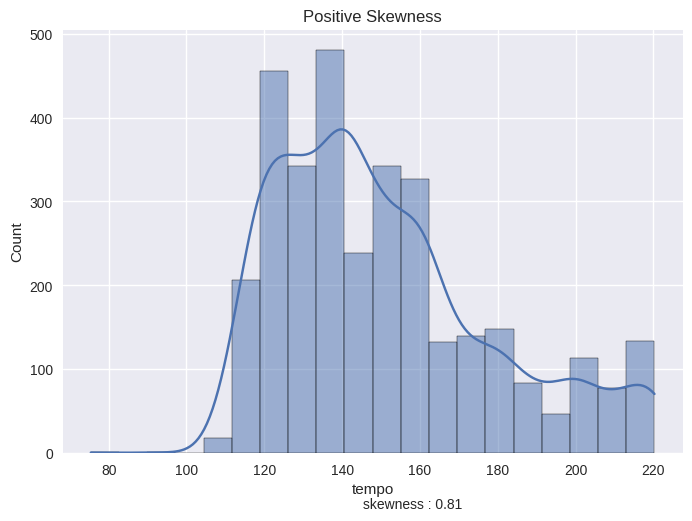

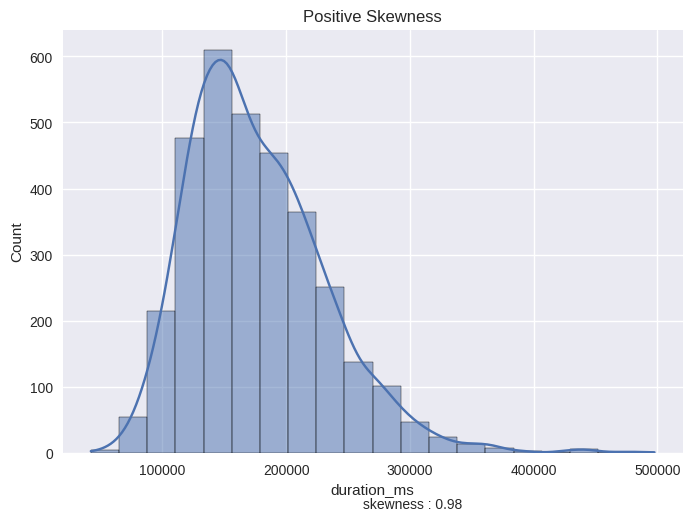

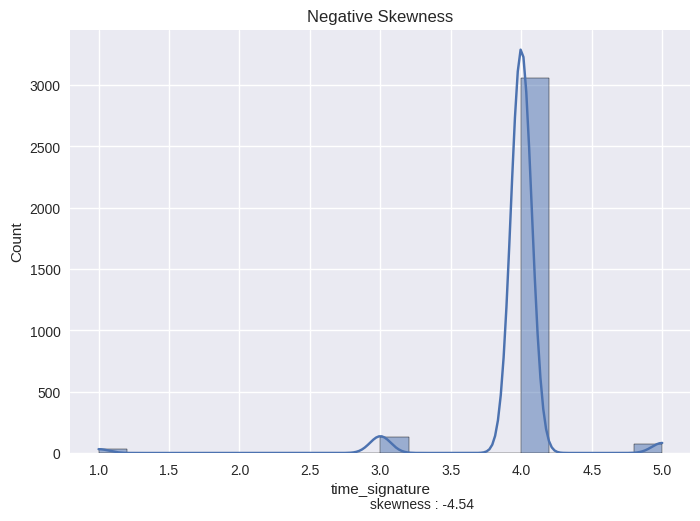

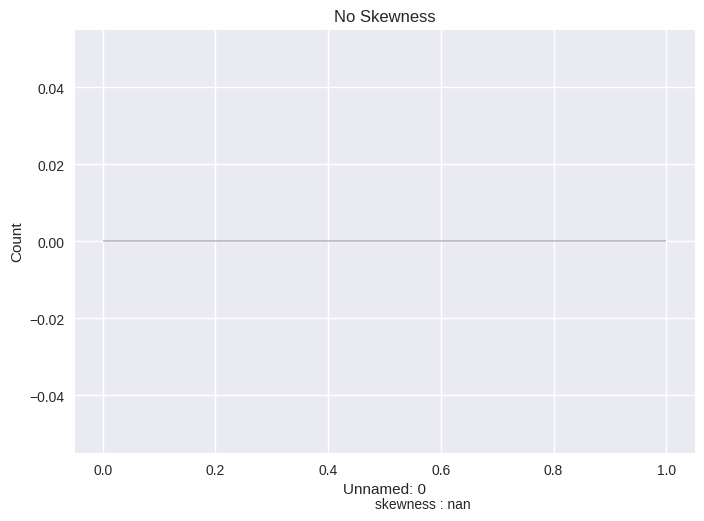

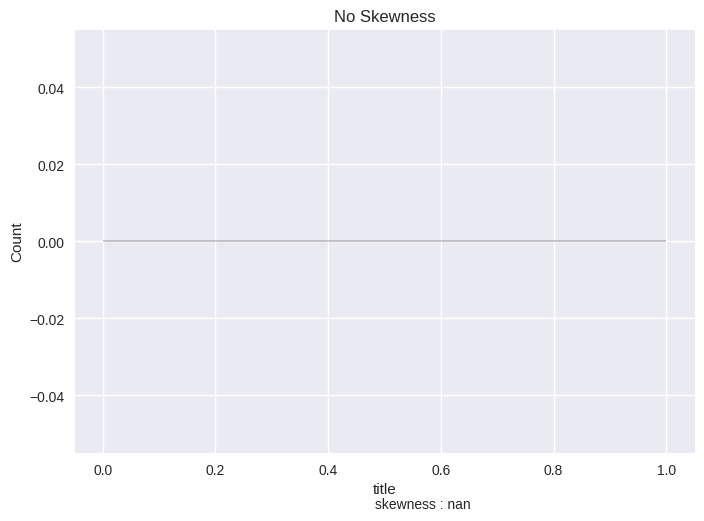

In [ ]:
numeric_cols  = musicdata._get_numeric_data().columns.tolist()

for i, column in enumerate(numeric_cols):
    sb.histplot(musicdata[column],bins = 20,kde = True);
    conclusion = FindSkewness(musicSkewness[i])
    mlt.title(conclusion)
    mlt.figtext(0.5,0.01,f"skewness : {musicSkewness[i]}")
    mlt.show()

Model Building (External Functions)

In [ ]:
def getSongIndex(songName):
    
    bool = musicdata['song_name'].isin([songName])
    # Getting Index Of Song If Present
    sindex = bool[bool==True].index[0]
    return sindex

In [ ]:
songName = input()

Venom


**MODEL BUILDING USING CLUSTERING**

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
linear_kernal = linear_kernel(normalized)
euclidian = euclidean_distances(normalized)
consine = cosine_similarity(normalized)

In [ ]:
def recommendation(m_name,model =linear_kernal):
    # default model is linear kernal 
    SongIndex = getSongIndex(m_name)
    score = list(enumerate(model[SongIndex]))
    sim_score = sorted(score,key = lambda x:x[1],reverse = True)
    sim_score = sim_score[1:11]
    Index = [i[0] for i in sim_score]
    return musicdata["song_name"].iloc[Index]

In [ ]:
musicdata.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN


In [ ]:
recommendation(songName)

3241                Searching
2234    West End (feat. Germ)
2273                 West End
1074                    Alone
95                   Tartarus
1157               Clark Kent
3279        Subtle Dissonance
238            Secure The Bag
28                 BLUE JUICE
1487        Cool Guy Syndrome
Name: song_name, dtype: object

In [ ]:
recommendation(songName,model =euclidian )

2887                            Intro
2754                        sacrifice
1367    SadlyThatsJustTheWayThingsAre
2971                           Shiver
3015                 End of Broadcast
2890                        Interlude
2744           last night (glo remix)
3025                          Wayward
718               Doesithurttoloveme?
1067                           Wither
Name: song_name, dtype: object

In [ ]:
recommendation(songName,model =consine )

951                               Dirt & Rubble
248             Lies About You (feat. Lil Durk)
1454                                He Got Game
271                           beibs in the trap
805                                  PATNAH DEM
1017                                 Battle Cry
1821                             Burn The Hoods
1632                                      Upset
397                                      F.T.W.
2115    Don't Bang My Line (feat. Night Lovell)
Name: song_name, dtype: object

# **Genre Prediction**

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from scikitplot.metrics import plot_roc_curve

In [ ]:
data=pd.read_csv('genres_v2.csv')

In [ ]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN


In [ ]:
data.shape

(9743, 22)

In [ ]:
data.head().T

,0,1,2,3,4
danceability,0.831,0.719,0.85,0.476,0.798
energy,0.814,0.493,0.893,0.781,0.624
key,2,8,5,0,2
loudness,-7.364,-7.23,-4.783,-4.71,-7.668
mode,1,1,1,1,1
speechiness,0.42,0.0794,0.0623,0.103,0.293
acousticness,0.0598,0.401,0.0138,0.0237,0.217
instrumentalness,0.0134,0.0,0.000004,0.0,0.0
liveness,0.0556,0.118,0.372,0.114,0.166
valence,0.389,0.124,0.0391,0.175,0.591


In [ ]:
data["genre"].value_counts()

Underground Rap    5164
Dark Trap          4578
Name: genre, dtype: int64

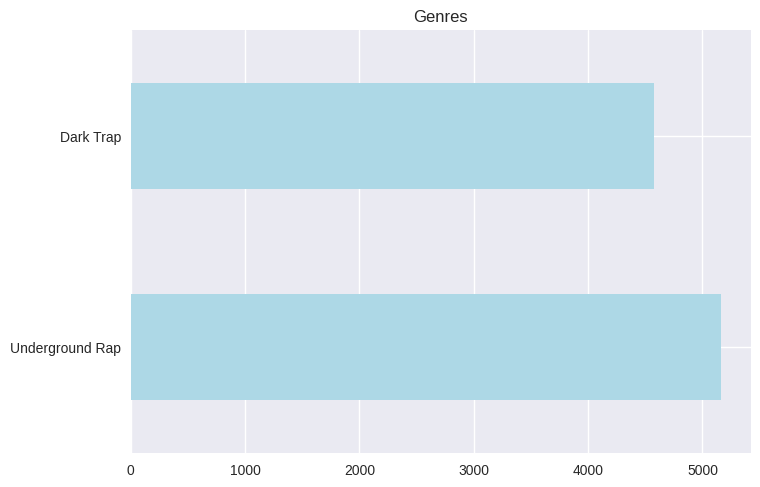

In [ ]:
data["genre"].value_counts().plot(kind="barh",color=["lightblue"],title="Genres");

In [ ]:
data.isna().sum()

danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  1
type                   1
id                     1
uri                    1
track_href             1
analysis_url           1
duration_ms            1
time_signature         1
genre                  1
song_name              1
Unnamed: 0          9743
title               9743
dtype: int64

<ipython-input-47-2692f37e4cb5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


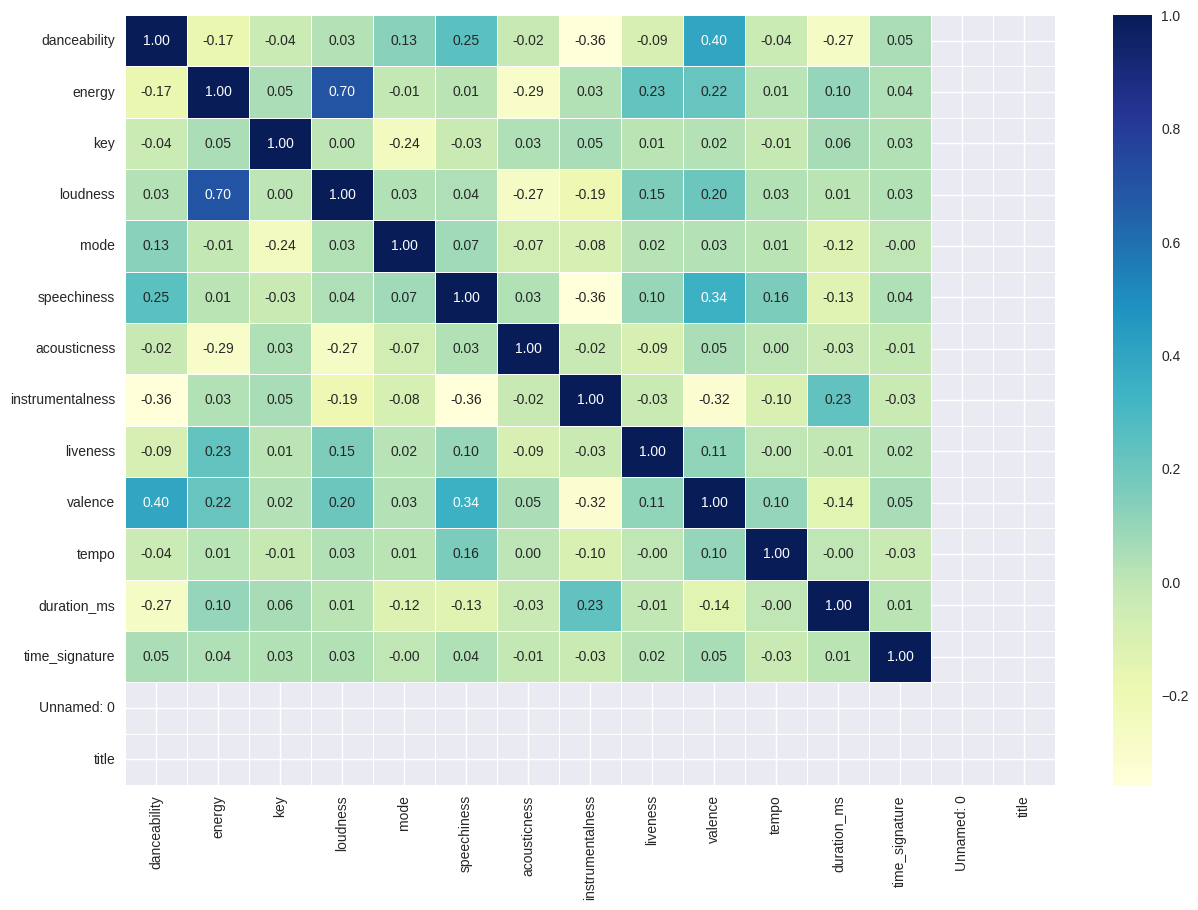

In [ ]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

In [ ]:
num_data=data.drop(["title","Unnamed: 0","song_name","analysis_url","track_href","uri","id","type"],axis=1) #drop all non-numeric columns
X=num_data.drop("genre",axis=1)
y=num_data["genre"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

We will use 3 different models for this problem:
1. Logistic regression
2. K-Nearest
3. Random Forest

In [ ]:
models={"LogReg":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    """
    np.random.seed(1)
    model_scores={}
    for name , model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores